# Intro

## Links

Canvas: https://canvas.northwestern.edu/courses/167719/assignments/1078606?module_item_id=2319265



Kaggle: https://www.kaggle.com/c/digit-recognizer

## Modules

In [2]:
#For data manipulation and visualization
#from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import subplots_adjust


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

from datetime import datetime

## Import Data

In [3]:
#Import data.csv from the Kaggle page linked above
# from google.colab import files
# files.upload()

In [4]:
df = pd.read_csv("train.csv")

# EDA

## Intro Stats

In [5]:
df.shape

(42000, 785)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# check for missing values
print(df.isna().sum().sum())
print(np.isnan(df).sum().sum())
print(df.isnull().sum().sum())

0
0
0


In [8]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Prep

In [9]:
y = df['label']
X = df.drop(columns = ['label'])

## Scale Data

In [10]:
# Conversion to float
X = X.astype('float32') 

# Normalization
X = X/255.0

# Models w/o Train/Test split

## Random Forest

In [11]:
start=datetime.now()
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)
end=datetime.now()
print(end-start)

0:00:18.502054


## PCA

In [12]:
# PCA on the combined training and test set data together
start=datetime.now()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
end=datetime.now()
print(end-start)

0:00:02.116401


In [13]:
pca.n_components_

154

In [14]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397506, 0.00384542,
       0.00374919, 0.00361013, 0.00348522, 0.00336488, 0.00320738,
       0.00315467, 0.00309146, 0.00293709, 0.00286541, 0.00280759,
       0.00269618, 0.00265831, 0.00256299, 0.00253821, 0.00246178,
       0.00239716, 0.0023874 , 0.00227591, 0.00221518, 0.00213934,
       0.00206133, 0.00202851, 0.00195977, 0.00193639, 0.00188485,
       0.00186751, 0.0018167 , 0.00176891, 0.00172592, 0.00166

### Random Forest

In [15]:
# random forest using PCA components
start=datetime.now()
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_reduced, y)
end=datetime.now()
print(end-start)

0:00:52.246855


## k-Means Clustering

In [16]:
# reshape data for k-means
X_k = X.values.reshape(len(X),-1)

In [17]:
# train k-means clustering model
kmeans = MiniBatchKMeans(n_clusters = 256, random_state=42)
kmeans.fit(X_k)

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=256, random_state=42)

In [18]:
kmeans.labels_

array([ 50, 112,  33, ..., 111, 232, 167])

In [19]:
# kmeans cluster numbers do no represent the label numbers, so we need to create a function to extract the label number from each cluster
# Associates most probable label with each cluster in KMeans model returns: dictionary of clusters assigned to each label
def retrieve_info(cluster_labels, y):

  # Initializing
  reference_labels = {}

# For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [20]:
# Calculating reference_labels
reference_labels = retrieve_info(kmeans.labels_, y)

# create a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [21]:
d = dict(zip(kmeans.labels_, number_labels))

# Models w/ Train-Test Split

In [22]:
y = df['label']
X = df.drop(columns = ['label'])

### Split Data for Training

In [23]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale Data

In [24]:
# Conversion to float
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

### Random Forest

In [25]:
start=datetime.now()
rf_clf2 = RandomForestClassifier(random_state=42)
rf_clf2.fit(X_train, y_train)
end=datetime.now()
print(end-start)

0:00:16.026886


In [26]:
# y predictions
y_pred = rf_clf2.predict(X_test)

In [27]:
# cross-validation
rf_scores = cross_val_score(rf_clf2, X_train, y_train, cv=5)
rf_scores.mean()

0.9615476190476191

In [28]:
# random forest model performance
print('f1-score:',f1_score(y_test, y_pred, average='macro'))
print('precision:',precision_score(y_test, y_pred, average="macro"))
print('recall:', recall_score(y_test, y_pred, average="macro"))  
print('accuracy:', accuracy_score(y_test, y_pred))

f1-score: 0.9629039101845235
precision: 0.9628494321468949
recall: 0.9630201177608895
accuracy: 0.9629761904761904


## PCA

In [29]:
# PCA on the the train set (applied to the test set)
start=datetime.now()
pca2 = PCA(n_components=0.95)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
end=datetime.now()
print(end-start)

0:00:01.999114


In [30]:
pca2.n_components_

153

In [31]:
pca2.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413, 0.05389551, 0.04892553,
       0.04336844, 0.03276574, 0.02892703, 0.02770703, 0.02329171,
       0.02093107, 0.02047164, 0.01707795, 0.01683206, 0.01584721,
       0.01487983, 0.01323098, 0.01283937, 0.01183384, 0.01151186,
       0.01075969, 0.01024215, 0.00966626, 0.00917296, 0.00884714,
       0.00833528, 0.00815071, 0.00775332, 0.00741987, 0.00693325,
       0.00660848, 0.00633209, 0.00603213, 0.0058873 , 0.0056183 ,
       0.00539861, 0.0050791 , 0.00487127, 0.00471253, 0.00464556,
       0.0045249 , 0.00444059, 0.00416518, 0.00395636, 0.00383604,
       0.00373128, 0.00360705, 0.00348865, 0.003342  , 0.00318011,
       0.00314205, 0.00307234, 0.00292367, 0.00286554, 0.00279118,
       0.00269329, 0.00264929, 0.00256639, 0.00252853, 0.00245253,
       0.0024055 , 0.00239097, 0.00226894, 0.00221636, 0.00214605,
       0.00205814, 0.0020172 , 0.00196308, 0.0019362 , 0.00188242,
       0.00185615, 0.00181757, 0.00175209, 0.0017258 , 0.00165

### Random Forest

In [32]:
start=datetime.now()
rf_pca2 = RandomForestClassifier(random_state=42)
rf_pca2.fit(X_train_pca2, y_train)
end=datetime.now()
print(end-start)

0:00:36.097300


In [33]:
# y predictions
y_pred = rf_pca2.predict(X_test_pca2)

In [34]:
# cross-validation
rf_scores = cross_val_score(rf_pca2, X_train_pca2, y_train, cv=5)
rf_scores.mean()

0.9372023809523811

In [35]:
# random forest model performance with PCA
print('f1-score:',f1_score(y_test, y_pred, average='macro'))
print('precision:',precision_score(y_test, y_pred, average="macro"))
print('recall:', recall_score(y_test, y_pred, average="macro"))  
print('accuracy:', accuracy_score(y_test, y_pred))

f1-score: 0.9392950955646109
precision: 0.9393349587176504
recall: 0.9393751480200129
accuracy: 0.9394047619047619


## k-Means Clustering

In [36]:
# reshape data for k-means
X_train_k = X_train.values.reshape(len(X_train),-1)
X_test_k = X_test.values.reshape(len(X_test),-1)

In [37]:
# train k-means clustering model
kmeans2 = MiniBatchKMeans(n_clusters = 256, random_state=42)
kmeans2.fit(X_train_k)

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=256, random_state=42)

In [38]:
kmeans2.labels_

array([208, 121,  34, ..., 171, 131,  90])

In [39]:
# kmeans cluster numbers do no represent the label numbers, so we need to create a function to extract the label number from each cluster
# Associates most probable label with each cluster in KMeans model returns: dictionary of clusters assigned to each label
def retrieve_info(cluster_labels, y_train):

  # Initializing
  reference_labels = {}

# For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [40]:
# Calculating reference_labels
reference_labels = retrieve_info(kmeans2.labels_, y_train)

# create a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans2.labels_))

for i in range(len(kmeans2.labels_)):
  number_labels[i] = reference_labels[kmeans2.labels_[i]]

In [41]:
# check number labels from fitted k_means model
number_labels

array([6., 5., 3., ..., 4., 6., 0.])

In [42]:
print('Accuracy score:{}'.format(accuracy_score(number_labels, y_train)))

Accuracy score:0.8978571428571429


In [43]:
# get cluster centrioids
centroids = kmeans.cluster_centers_
centroids.shape

(256, 784)

In [44]:
# reshape centroids
centroids = centroids.reshape(256,28,28)

In [45]:
# de-normalize centroids
centroids = centroids * 255

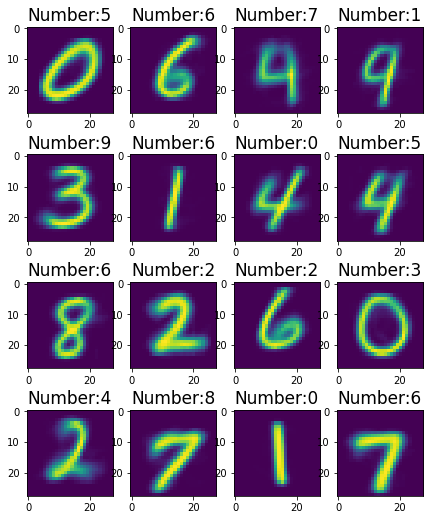

In [46]:
# plot fitted model results
plt.figure(figsize = (10,9))

bottom = 0.35

for i in range(16):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])

In [47]:
# use fitted model to predict using test split data
y_pred = kmeans2.predict(X_test_k)

In [48]:
# revise retrieve_info function to work with y_pred and y_test variables
def retrieve_info_2(cluster_labels, y_test):

  # Initializing
  reference_labels = {}

# For loop to run through each label of cluster label
  for i in range(len(np.unique(y_pred))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_test[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [49]:
# Calculating reference_labels
reference_labels = retrieve_info_2(y_pred, y_test)

# create a list which denotes the number displayed in image
y_pred_labels = np.random.rand(len(y_pred))

for i in range(len(y_pred)):
  y_pred_labels[i] = reference_labels[y_pred[i]]

In [50]:
# orginal y_pred results (not 0-10)
y_pred

array([218,   3, 112, ..., 193,  99,  45])

In [51]:
# y_pred results with correct number labels (0-10)
y_pred_labels

array([8., 1., 9., ..., 3., 0., 9.])

In [52]:
print('Accuracy score:{}'.format(accuracy_score(y_pred_labels, y_test)))

Accuracy score:0.8938095238095238


In [53]:
print('f1-score:{}'.format(f1_score(y_pred_labels, y_test, average='macro')))
print('precision:{}'.format(precision_score(y_pred_labels, y_test, average='macro')))
print('recall:{}'.format(recall_score(y_pred_labels, y_test, average='macro')))

f1-score:0.8933410732445408
precision:0.893399547141453
recall:0.8938762506974571


In [54]:
d2 = dict(zip(kmeans2.labels_, number_labels))

# Testing

In [55]:
#create dataframe using test data from kaggle
df_test = pd.read_csv("test.csv")

In [56]:
len(df_test)

28000

## Scale Data

In [57]:
# Conversion to float
df_float = df_test.astype('float32')

# Normalization
X = df_float/255.0

X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Test Models

### Models w/o Train-Test Split

In [58]:
#Random Forest One
rf_1_pred = pd.DataFrame(rf_clf.predict(X),columns = ['Label'])

rf_1_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

rf_1_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [59]:
#Random Forest Two 

#Transform the Data to Fit
X_pca1 = pca.transform(X)

# y predictions
pca_1_pred = pd.DataFrame(rf_pca.predict(X_pca1),columns = ['Label'])

pca_1_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

pca_1_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


In [60]:
#k-Means Clustering
X_k = X.values.reshape(len(X),-1)
# y predictions
k_means_pred = kmeans.predict(X_k)

keys = k_means_pred

k_means_pred = np.array([d[key] for key in keys])

kmeans_pred = pd.DataFrame(k_means_pred, columns = ['Label']).astype('int')

kmeans_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

kmeans_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,7
3,4,8
4,5,3


### Models w/ Train-Test Split

In [61]:
#Random Forest One v2
rf_a_pred = pd.DataFrame(rf_clf2.predict(X),columns = ['Label'])

rf_a_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

rf_a_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [62]:
#Random Forest Two v2

#Transform the Data to Fit
X_pca2 = pca2.transform(X)

# y predictions
pca_b_pred = rf_pca2.predict(X_pca2)

# y predictions
pca_b_pred = pd.DataFrame(rf_pca2.predict(X_pca2),columns = ['Label'])

pca_b_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

pca_b_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [63]:
#k-Means Clustering v2
X_k = X.values.reshape(len(X),-1)

# y predictions
k_means_pred2 = kmeans2.predict(X_k)

# loop through predictions and get key values(number labels) from dictionary
keys = k_means_pred2

k_means_pred2 = np.array([d2[key] for key in keys])

# create df with new labels
kmeans_pred2 = pd.DataFrame(k_means_pred2, columns = ['Label']).astype('int')

kmeans_pred2.insert(0, 'ImageId', range(1, 1 + len(X)))

kmeans_pred2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


## Download the Files

Leave these commented out unless downloading a final version.

In [64]:
# rf_1_pred.to_csv('rf_1_pred-group_5_msds_422.csv', index=False)
# files.download('rf_1_pred-group_5_msds_422.csv')

In [65]:
# pca_1_pred.to_csv('pca_1_pred-group_5_msds_422.csv', index=False)
# files.download('pca_1_pred-group_5_msds_422.csv')

In [66]:
# kmeans_pred.to_csv('kmeans_pred-group_5_msds_422.csv', index=False)
# files.download('kmeans_pred-group_5_msds_422.csv')

In [67]:
# rf_a_pred.to_csv('rf_a_pred-group_5_msds_422.csv', index=False)
# files.download('rf_a_pred-group_5_msds_422.csv')

In [68]:
# pca_b_pred.to_csv('pca_b_pred-group_5_msds_422.csv', index=False)
# files.download('pca_b_pred-group_5_msds_422.csv')

In [69]:
# kmeans_pred2.to_csv('kmeans_pred2-group_5_msds_422.csv', index=False)
# files.download('kmeans_pred2-group_5_msds_422.csv')